# 1. 데이터 가져오기

- sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
- diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [1]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [2]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [47]:
import pandas as pd

df_X = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df_y = pd.DataFrame(diabetes.target)

df_X.shape, df_y.shape

((442, 10), (442, 1))

In [5]:
df_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [6]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


## 1-1 데이터 전처리 수행하기

In [7]:
df_diabetes = pd.concat([df_X, df_y], axis = 1)
df_diabetes.rename(columns = {0: "target"}, inplace = True)
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


<AxesSubplot:>

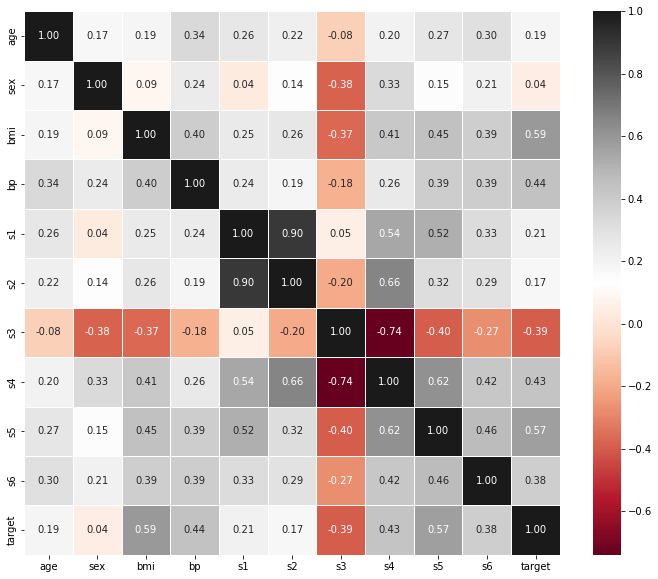

In [8]:
# 상관계수 확인하기
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (12, 10))
sns.heatmap(data = df_diabetes.corr(), annot = True, fmt = '.2f', linewidths = 0.5, cmap = 'RdGy')

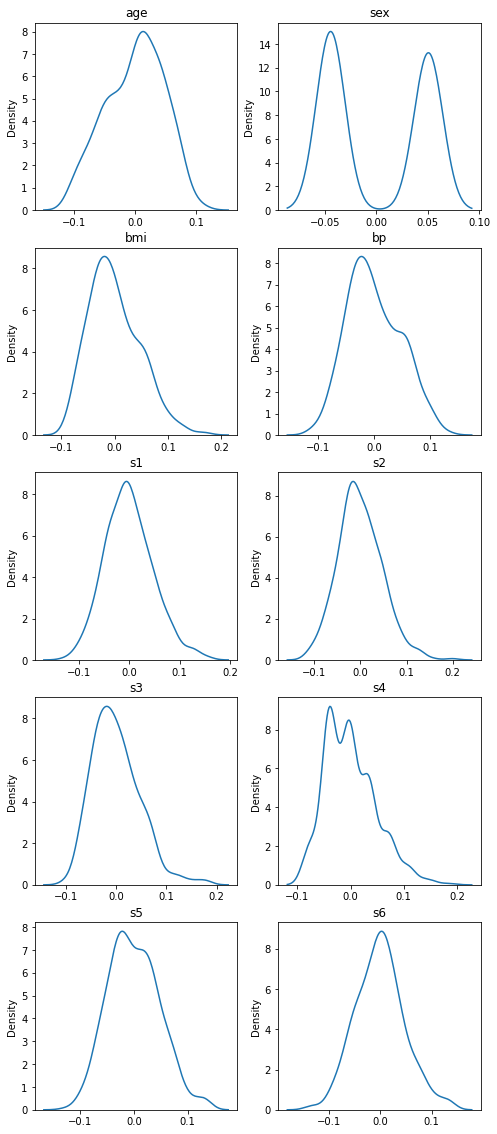

In [9]:
# 데이터 분포 확인하기 -> 이미 standardized 되어있어서 데이터 분포가 정규분표를 따름
fig, ax = plt.subplots(5, 2, figsize = (8, 20))
columns = df_X.columns

count = 0

for row in range(5):
    for col in range(2):
        sns.kdeplot(data = df_X[columns[count]], ax = ax[row][col] )
        ax[row][col].set_xlabel('')
        ax[row][col].set_title(f'{columns[count]}')
        count += 1

plt.show()

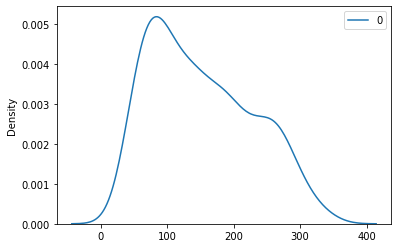

In [10]:
sns.kdeplot(data = df_y)
plt.show()

# 2~3. 모델에 입력할 X, y 준비하기

In [11]:
# df_X와 df_y 값 numpy array로 변환하기
X = df_X.values
y = df_y.values

# 4. train 데이터와 test 데이터로 분리하기

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 2024)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((309, 10), (309, 1), (133, 10), (133, 1))

In [13]:
# y_train, y_test의 차원수를 낮춤
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

y_train.shape, y_test.shape

((309,), (133,))

# 5. 모델 준비하기

In [14]:
# 입력 데이터 개수에 맞는 가중치 w, b 준비하기 
import numpy as np
W = np.random.rand(10)
b = np.random.rand()

In [15]:
# 모델 함수 구현 
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

# 6. 손실함수 loss 정의하기 

In [16]:
# 손실함수를 MSE 함수로 정의
def MSE(y, y_pred):
    mse = ((y-y_pred)**2).mean()
    return mse

In [17]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

# 7.  기울기를 구하는 gradient 함수 구현하기

In [18]:
def gradient(X, W, b, y):
    N = len(y)
    y_pred = model(X, W, b)
    dW = 1/ N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

# 8. 하이퍼 파라미터인 학습률 설정하기 

In [19]:
LEARNING_RATE = 0.01

# 9. 모델 학습하기

In [20]:
losses = []

for i in range(1, 100001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d: Loss %0.4f'%(i, L))

Iteration 1000: Loss 5206.3448
Iteration 2000: Loss 4735.3804
Iteration 3000: Loss 4383.8504
Iteration 4000: Loss 4117.7368
Iteration 5000: Loss 3913.1525
Iteration 6000: Loss 3753.2744
Iteration 7000: Loss 3626.2102
Iteration 8000: Loss 3523.5151
Iteration 9000: Loss 3439.1584
Iteration 10000: Loss 3368.8045
Iteration 11000: Loss 3309.3109
Iteration 12000: Loss 3258.3782
Iteration 13000: Loss 3214.3049
Iteration 14000: Loss 3175.8166
Iteration 15000: Loss 3141.9450
Iteration 16000: Loss 3111.9437
Iteration 17000: Loss 3085.2280
Iteration 18000: Loss 3061.3327
Iteration 19000: Loss 3039.8819
Iteration 20000: Loss 3020.5669
Iteration 21000: Loss 3003.1311
Iteration 22000: Loss 2987.3580
Iteration 23000: Loss 2973.0633
Iteration 24000: Loss 2960.0881
Iteration 25000: Loss 2948.2946
Iteration 26000: Loss 2937.5623
Iteration 27000: Loss 2927.7850
Iteration 28000: Loss 2918.8691
Iteration 29000: Loss 2910.7312
Iteration 30000: Loss 2903.2972
Iteration 31000: Loss 2896.5007
Iteration 32000: 

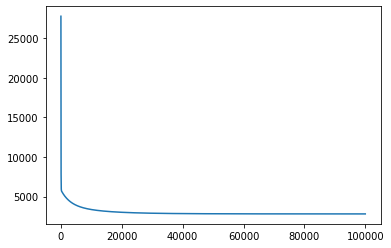

In [21]:
# loss 시각화
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

# 10. test 데이터에 대한 성능 확인하기

In [22]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

3107.8113439607378

# 11. 정답 데이터와 예측한 데이터 시각화하기

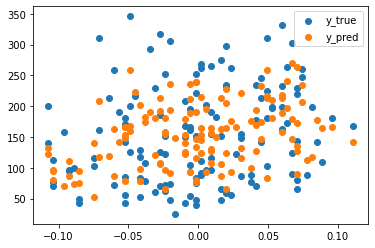

In [23]:
plt.scatter(X_test[:, 0], y_test).set_label('y_true')
plt.scatter(X_test[:, 0], prediction).set_label('y_pred')
plt.legend()
plt.show()

# 2차 시도 

In [24]:
y_train_z = (y_train - y_train.mean())/y_train.std()
y_test_z = (y_test - y_train.mean())/y_train.std()

In [25]:
# 입력 데이터 개수에 맞는 가중치 w, b 준비하기 
import numpy as np
W = np.random.rand(10)
b = np.random.rand()

In [26]:
losses = []

for i in range(1, 100001):
    dW, db = gradient(X_train, W, b, y_train_z)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train_z)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d: Loss %0.4f'%(i, L))

Iteration 1000: Loss 0.7944
Iteration 2000: Loss 0.7426
Iteration 3000: Loss 0.7024
Iteration 4000: Loss 0.6708
Iteration 5000: Loss 0.6453
Iteration 6000: Loss 0.6246
Iteration 7000: Loss 0.6075
Iteration 8000: Loss 0.5932
Iteration 9000: Loss 0.5810
Iteration 10000: Loss 0.5705
Iteration 11000: Loss 0.5614
Iteration 12000: Loss 0.5535
Iteration 13000: Loss 0.5465
Iteration 14000: Loss 0.5403
Iteration 15000: Loss 0.5348
Iteration 16000: Loss 0.5299
Iteration 17000: Loss 0.5255
Iteration 18000: Loss 0.5215
Iteration 19000: Loss 0.5180
Iteration 20000: Loss 0.5148
Iteration 21000: Loss 0.5119
Iteration 22000: Loss 0.5092
Iteration 23000: Loss 0.5068
Iteration 24000: Loss 0.5047
Iteration 25000: Loss 0.5027
Iteration 26000: Loss 0.5009
Iteration 27000: Loss 0.4993
Iteration 28000: Loss 0.4978
Iteration 29000: Loss 0.4965
Iteration 30000: Loss 0.4952
Iteration 31000: Loss 0.4941
Iteration 32000: Loss 0.4931
Iteration 33000: Loss 0.4921
Iteration 34000: Loss 0.4913
Iteration 35000: Loss 0

In [27]:
prediction = model(X_test, W, b)
# 정규화 > 원래 값으로 변환
prediction = (prediction * y_train.std()) + y_train.mean()

In [28]:
def MSE_z(y, y_pred):
    y = (y * y_train.std()) + y_train.mean()
    mse = ((y-y_pred)**2).mean()
    return mse

In [29]:
mse = MSE_z(y_test_z, prediction)
mse

3108.384705008671

- y값 정규화 수행 후 모델학습 하는 것은 효과가 미미함... mse값 3정도만 감소함

# 3차 시도 - PCA

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 9)
pca.fit(df_X)
df_pca = pca.transform(df_X)
df_pca.shape

(442, 9)

In [31]:
pca.explained_variance_ratio_.sum()

0.9991439470098975

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size = 0.3, shuffle = True, random_state = 2024)

In [33]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

W = np.random.rand(X_train.shape[1])
b = np.random.rand()

losses = []

for i in range(1, 100001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d: Loss %0.4f'%(i, L))

Iteration 1000: Loss 5205.2582
Iteration 2000: Loss 4734.0381
Iteration 3000: Loss 4382.3910
Iteration 4000: Loss 4116.2516
Iteration 5000: Loss 3911.7002
Iteration 6000: Loss 3751.8915
Iteration 7000: Loss 3624.9184
Iteration 8000: Loss 3522.3260
Iteration 9000: Loss 3438.0770
Iteration 10000: Loss 3367.8315
Iteration 11000: Loss 3308.4442
Iteration 12000: Loss 3257.6140
Iteration 13000: Loss 3213.6386
Iteration 14000: Loss 3175.2431
Iteration 15000: Loss 3141.4590
Iteration 16000: Loss 3111.5399
Iteration 17000: Loss 3084.9015
Iteration 18000: Loss 3061.0787
Iteration 19000: Loss 3039.6958
Iteration 20000: Loss 3020.4447
Iteration 21000: Loss 3003.0688
Iteration 22000: Loss 2987.3522
Iteration 23000: Loss 2973.1107
Iteration 24000: Loss 2960.1857
Iteration 25000: Loss 2948.4397
Iteration 26000: Loss 2937.7523
Iteration 27000: Loss 2928.0178
Iteration 28000: Loss 2919.1424
Iteration 29000: Loss 2911.0432
Iteration 30000: Loss 2903.6462
Iteration 31000: Loss 2896.8851
Iteration 32000: 

In [34]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

3109.489436824413

In [35]:
mse_list = []

for i in range(9):
    pca = PCA(n_components = i+1)
    pca.fit(df_X)
    df_pca = pca.transform(df_X)
    
    print(f"When n_components = {i+1}, explained_variance_ratio = {pca.explained_variance_ratio_.sum()}")
    
    X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size = 0.3, shuffle = True, random_state = 2024)
    
    y_train = y_train.reshape(-1)
    y_test = y_test.reshape(-1)

    W = np.random.rand(X_train.shape[1])
    b = np.random.rand()

    losses = []

    for i in range(1, 100001):
        dW, db = gradient(X_train, W, b, y_train)
        W -= LEARNING_RATE * dW
        b -= LEARNING_RATE * db
        L = loss(X_train, W, b, y_train)
        losses.append(L)
        #if i % 1000 == 0:
            #print('Iteration %d: Loss %0.4f'%(i, L))
    
    mse = loss(X_test, W, b, y_test)
    mse_list.append(mse)

When n_components = 1, explained_variance_ratio = 0.4024214175678733
When n_components = 2, explained_variance_ratio = 0.5516532410893153
When n_components = 3, explained_variance_ratio = 0.6722494722420754
When n_components = 4, explained_variance_ratio = 0.7677971110209649
When n_components = 5, explained_variance_ratio = 0.8340156689459763
When n_components = 6, explained_variance_ratio = 0.8942875900367641
When n_components = 7, explained_variance_ratio = 0.9479436357350411
When n_components = 8, explained_variance_ratio = 0.9913119559917795
When n_components = 9, explained_variance_ratio = 0.9991439470098975


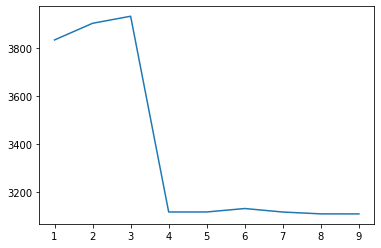

In [36]:
plt.plot([x for x in range(1, 10, 1)], mse_list)
plt.show()

In [37]:
min(mse_list)

3109.4782470490086

- PCA 수행하니 오히려 기본 모델보다 mse 값 올라감..

# 4차 시도 - 상관계수 낮은 SEX 값 없애고 모델학습 수행

In [38]:
df_X4 = df_X.drop('sex', axis = 1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(df_X4, y, test_size = 0.3, shuffle = True, random_state = 2024)
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)
X_train = X_train.values
X_test = X_test.values

In [43]:
y_train.shape, y_test.shape

((309,), (133,))

In [45]:
W = np.random.rand(9)
b = np.random.rand()

losses = []

for i in range(1, 100001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d: Loss %0.4f'%(i, L))

Iteration 1000: Loss 5208.9235
Iteration 2000: Loss 4736.2728
Iteration 3000: Loss 4383.5143
Iteration 4000: Loss 4117.2803
Iteration 5000: Loss 3913.8648
Iteration 6000: Loss 3756.3791
Iteration 7000: Loss 3632.7502
Iteration 8000: Loss 3534.3120
Iteration 9000: Loss 3454.8135
Iteration 10000: Loss 3389.7196
Iteration 11000: Loss 3335.7173
Iteration 12000: Loss 3290.3677
Iteration 13000: Loss 3251.8589
Iteration 14000: Loss 3218.8314
Iteration 15000: Loss 3190.2538
Iteration 16000: Loss 3165.3342
Iteration 17000: Loss 3143.4573
Iteration 18000: Loss 3124.1384
Iteration 19000: Loss 3106.9910
Iteration 20000: Loss 3091.7030
Iteration 21000: Loss 3078.0192
Iteration 22000: Loss 3065.7289
Iteration 23000: Loss 3054.6556
Iteration 24000: Loss 3044.6511
Iteration 25000: Loss 3035.5888
Iteration 26000: Loss 3027.3607
Iteration 27000: Loss 3019.8736
Iteration 28000: Loss 3013.0465
Iteration 29000: Loss 3006.8092
Iteration 30000: Loss 3001.0999
Iteration 31000: Loss 2995.8648
Iteration 32000: 

In [46]:
mse = loss(X_test, W, b, y_test)
mse

3195.6178913155504

# 5차 시도 - 상관계수 높은 s1, s3 삭제 후 모델링 

In [51]:
df_X5 = df_X.drop(['s1', 's3'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(df_X5, y, test_size = 0.3, shuffle = True, random_state = 2024)
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)
X_train = X_train.values
X_test = X_test.values

In [53]:
W = np.random.rand(8)
b = np.random.rand()

losses = []

for i in range(1, 100001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d: Loss %0.4f'%(i, L))

Iteration 1000: Loss 5278.7424
Iteration 2000: Loss 4840.8250
Iteration 3000: Loss 4501.3016
Iteration 4000: Loss 4236.0312
Iteration 5000: Loss 4026.9825
Iteration 6000: Loss 3860.6718
Iteration 7000: Loss 3727.0011
Iteration 8000: Loss 3618.3942
Iteration 9000: Loss 3529.1552
Iteration 10000: Loss 3454.9902
Iteration 11000: Loss 3392.6527
Iteration 12000: Loss 3339.6785
Iteration 13000: Loss 3294.1894
Iteration 14000: Loss 3254.7464
Iteration 15000: Loss 3220.2406
Iteration 16000: Loss 3189.8113
Iteration 17000: Loss 3162.7859
Iteration 18000: Loss 3138.6338
Iteration 19000: Loss 3116.9326
Iteration 20000: Loss 3097.3429
Iteration 21000: Loss 3079.5889
Iteration 22000: Loss 3063.4439
Iteration 23000: Loss 3048.7198
Iteration 24000: Loss 3035.2586
Iteration 25000: Loss 3022.9263
Iteration 26000: Loss 3011.6079
Iteration 27000: Loss 3001.2041
Iteration 28000: Loss 2991.6282
Iteration 29000: Loss 2982.8040
Iteration 30000: Loss 2974.6640
Iteration 31000: Loss 2967.1481
Iteration 32000: 

In [54]:
mse = loss(X_test, W, b, y_test)
mse

3140.639905375354

# 6차 시도 - Polynomial Features

In [56]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_interact = poly.fit_transform(df_X)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_interact, y, test_size = 0.3, shuffle = True, random_state = 2024)
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [59]:
X_train.shape

(309, 56)

In [60]:
W = np.random.rand(56)
b = np.random.rand()

losses = []

for i in range(1, 100001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d: Loss %0.4f'%(i, L))

Iteration 1000: Loss 5201.8770
Iteration 2000: Loss 4731.2674
Iteration 3000: Loss 4380.0226
Iteration 4000: Loss 4114.1361
Iteration 5000: Loss 3909.7311
Iteration 6000: Loss 3749.9930
Iteration 7000: Loss 3623.0366
Iteration 8000: Loss 3520.4230
Iteration 9000: Loss 3436.1261
Iteration 10000: Loss 3365.8140
Iteration 11000: Loss 3306.3469
Iteration 12000: Loss 3255.4278
Iteration 13000: Loss 3211.3572
Iteration 14000: Loss 3172.8618
Iteration 15000: Loss 3138.9748
Iteration 16000: Loss 3108.9506
Iteration 17000: Loss 3082.2053
Iteration 18000: Loss 3058.2744
Iteration 19000: Loss 3036.7825
Iteration 20000: Loss 3017.4216
Iteration 21000: Loss 2999.9352
Iteration 22000: Loss 2984.1075
Iteration 23000: Loss 2969.7543
Iteration 24000: Loss 2956.7171
Iteration 25000: Loss 2944.8584
Iteration 26000: Loss 2934.0578
Iteration 27000: Loss 2924.2096
Iteration 28000: Loss 2915.2202
Iteration 29000: Loss 2907.0065
Iteration 30000: Loss 2899.4944
Iteration 31000: Loss 2892.6180
Iteration 32000: 

In [61]:
mse = loss(X_test, W, b, y_test)
mse

3099.2596541039684

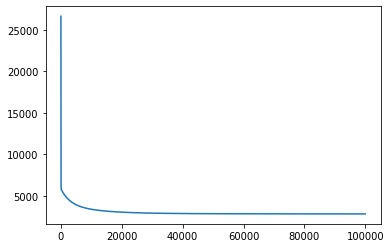

In [62]:
plt.plot(losses)
plt.show()

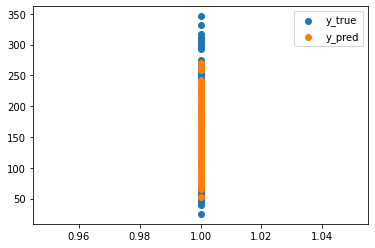

In [63]:
prediction = model(X_test, W, b)

plt.scatter(X_test[:, 0], y_test).set_label('y_true')
plt.scatter(X_test[:, 0], prediction).set_label('y_pred')
plt.legend()
plt.show()